# Exploratory Analysis and Data Preparation

### 1. Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from IPython.display import display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline


The following chart shows the number of crawled pages for each site and their number of URLs pairs.

In [2]:
# create a status dataframe to hold each dataset stats
gen_stat_df = pd.DataFrame(columns=["Name", "Pages Count", "Scores Count"])
def add_gen_stat_df(fname):
    conn = sqlite3.connect("datasets/%s.sqlite" %  (fname))
    df1 = pd.read_sql_query("select id from pages;", conn)
    df2 = pd.read_sql_query("select score from scores;", conn)
    df2 = df2[np.isfinite(df2['score'])]
    global gen_stat_df
    gen_stat_df = gen_stat_df.append( [{"Name": fname, "Pages Count": len(df1), "Scores Count":len(df2)}], ignore_index=True)

    
add_gen_stat_df("ubuntu")
add_gen_stat_df("bodybuilding")
add_gen_stat_df("digitalspys")
add_gen_stat_df("mozillazine")

gen_stat_df.head()

,Name,Pages Count,Scores Count
0,ubuntu,29555,41203
1,bodybuilding,15182,47668
2,digitalspys,5969,115000
3,mozillazine,17495,150629


[Text(0,0.5,'Count'), Text(0.5,0,'Dataset')]

Text(0.5,1,'Count of pages and Urls pairs')

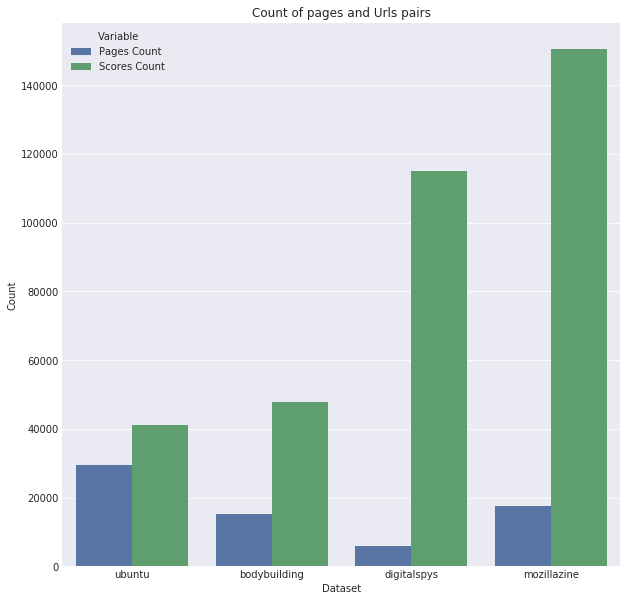

In [12]:
# Show barplot for each dataset
current_palette = sns.color_palette("deep", 4)
sns.set_palette(current_palette)
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = (
    gen_stat_df.set_index('Name')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Count'})
)

sns_plot = sns.barplot(x='Name', y='Count', hue='Variable', data=tidy, ax=ax1)
sns.set_style("darkgrid")
sns.despine(fig)
sns_plot.set(xlabel='Dataset', ylabel='Count');
sns_plot.set_title("Count of pages and Urls pairs");
fig.savefig("barplot.png")

The content_lengths dict will hold each url and its corresponding paage content length

In [3]:
def get_content_length(fname):
    conn = sqlite3.connect("datasets/%s.sqlite" %  (fname))
    df = pd.read_sql_query("select url, LENGTH(content_text) from pages;", conn)
    
    return df
    
content_lengths = {"ubuntu": get_content_length("ubuntu"), "bodybuilding": get_content_length("bodybuilding"), "digitalspy": get_content_length("digitalspys"), "mozilla": get_content_length("mozillazine")}


In [6]:
def get_df(fname):
    conn = sqlite3.connect(fname)
    df = pd.read_sql_query("select url1, url2, struct_score, sem_score, score from scores;", conn)
    
    df['url1'] = df['url1'].apply(lambda x: x.decode('utf8') if type(x) != str else x )
    df['url2'] = df['url2'].apply(lambda x: x.decode('utf8') if type(x) != str else x )
    
    df = df[np.isfinite(df['score'])]
    return df

In [7]:
# main dataframe holding the scores table records
ubuntu_df = get_df("datasets/ubuntu.sqlite")
bodybuilding_df = get_df("datasets/bodybuilding.sqlite")
digitalspy_df = get_df("datasets/digitalspys.sqlite")
mozilla_df = get_df("datasets/mozillazine.sqlite")

datasets = {"ubuntu": ubuntu_df, "bodybuilding": bodybuilding_df, "digitalspy": digitalspy_df, "mozilla": mozilla_df}


Showing various statistics for each score dataset 

<Figure size 1200x800 with 0 Axes>

ubuntu


,url1,url2,struct_score,sem_score,score
0,https://ubuntuforums.org/forumdisplay.php?f=130,https://ubuntuforums.org/showthread.php?t=1293779,0.337465,0.951408,0.644436
1,https://ubuntuforums.org/forumdisplay.php?f=130,https://ubuntuforums.org/showthread.php?t=760568,0.259467,0.427136,0.343302
2,https://ubuntuforums.org/forumdisplay.php?f=130,https://ubuntuforums.org/showthread.php?t=7261...,0.209940,0.837926,0.523933
3,https://ubuntuforums.org/forumdisplay.php?f=130,https://discourse.ubuntu.com/,0.026293,0.297188,0.161741
4,https://ubuntuforums.org/forumdisplay.php?f=130,https://ubuntuforums.org/showthread.php?t=153402,0.322236,0.901640,0.611938


,url1,url2,struct_score,sem_score,score
41198,https://ubuntuforums.org/showthread.php?t=4208...,https://ubuntuforums.org/showthread.php?t=4210...,0.996462,0.999946,0.998204
41199,https://ubuntuforums.org/showthread.php?t=1571...,https://ubuntuforums.org/showthread.php?t=1575...,0.902971,0.958959,0.930965
41200,https://ubuntuforums.org/showthread.php?t=1579...,https://ubuntuforums.org/showthread.php?t=1575...,0.996015,0.999941,0.997978
41201,https://ubuntuforums.org/showthread.php?t=1403...,https://ubuntuforums.org/showthread.php?t=2378...,0.851537,0.883798,0.867667
41202,https://ubuntuforums.org/showthread.php?t=5032...,https://ubuntuforums.org/showthread.php?t=2378...,0.996142,0.999947,0.998045


,struct_score,sem_score,score
count,41203.000000,41203.000000,41203.000000
mean,0.677377,0.782548,0.729963
std,0.307755,0.279295,0.272233
min,0.001939,0.002536,0.007479
25%,0.323282,0.761808,0.602276
50%,0.840431,0.911302,0.845229
75%,0.930547,0.969011,0.940291
max,1.000000,1.000000,1.000000


bodybuilding


,url1,url2,struct_score,sem_score,score
0,https://forum.bodybuilding.com,https://forum.bodybuilding.com/archive/index.p...,0.026921,0.309819,0.168370
1,https://forum.bodybuilding.com,https://bodyspace.bodybuilding.com/,0.213915,0.445004,0.329459
2,https://forum.bodybuilding.com,https://forum.bodybuilding.com/search.php?sear...,0.724299,0.597201,0.660750
3,https://forum.bodybuilding.com,https://forum.bodybuilding.com/showthread.php?...,0.558220,0.655454,0.606837
4,https://forum.bodybuilding.com,https://forum.bodybuilding.com/showthread.php?...,0.540591,0.655663,0.598127


,url1,url2,struct_score,sem_score,score
47663,https://forum.bodybuilding.com/showthread.php?...,https://forum.bodybuilding.com/showthread.php?...,0.890071,1.0,0.945035
47664,https://forum.bodybuilding.com/showthread.php?...,https://forum.bodybuilding.com/showthread.php?...,0.890071,1.0,0.945035
47665,https://forum.bodybuilding.com/showthread.php?...,https://forum.bodybuilding.com/showthread.php?...,0.890071,1.0,0.945035
47666,https://forum.bodybuilding.com/showthread.php?...,https://forum.bodybuilding.com/showthread.php?...,0.890071,1.0,0.945035
47667,https://forum.bodybuilding.com/showthread.php?...,https://forum.bodybuilding.com/showthread.php?...,0.890071,1.0,0.945035


,struct_score,sem_score,score
count,47668.000000,47668.000000,47668.000000
mean,0.851848,0.822666,0.837257
std,0.154250,0.168091,0.153127
min,0.001947,0.000000,0.001218
25%,0.782766,0.713941,0.752947
50%,0.876383,0.835386,0.849081
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


digitalspy


,url1,url2,struct_score,sem_score,score
0,https://forums.digitalspy.com/categories/music,https://forums.digitalspy.com/discussion/23030...,0.333277,0.340897,0.337087
1,https://forums.digitalspy.com/categories/music,https://forums.digitalspy.com/discussion/23030...,0.302892,0.394270,0.348581
2,https://forums.digitalspy.com/categories/music,https://forums.digitalspy.com/categories/music...,0.546303,0.711650,0.628976
3,https://forums.digitalspy.com/categories/music,https://forums.digitalspy.com/categories/stric...,0.521737,0.759594,0.640665
4,https://forums.digitalspy.com/categories/music,https://forums.digitalspy.com/categories/music...,0.542990,0.772409,0.657699


,url1,url2,struct_score,sem_score,score
114995,https://forums.digitalspy.com/discussion/comme...,https://forums.digitalspy.com/discussion/comme...,0.522134,0.880533,0.701333
114996,https://forums.digitalspy.com/discussion/comme...,https://forums.digitalspy.com/discussion/comme...,1.000000,1.000000,1.000000
114997,https://forums.digitalspy.com/discussion/comme...,https://forums.digitalspy.com/discussion/21411...,0.511665,0.848340,0.680002
114998,https://forums.digitalspy.com/discussion/comme...,https://forums.digitalspy.com/discussion/comme...,1.000000,1.000000,1.000000
114999,https://forums.digitalspy.com/discussion/comme...,https://forums.digitalspy.com/discussion/comme...,0.522134,0.880533,0.701333


,struct_score,sem_score,score
count,115000.000000,115000.000000,115000.000000
mean,0.948192,0.930450,0.939321
std,0.150425,0.230506,0.151776
min,0.235752,0.000000,0.238465
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


mozilla


,url1,url2,struct_score,sem_score,score
0,http://forums.mozillazine.org/viewtopic.php?f=...,http://forums.mozillazine.org/viewtopic.php?f=...,0.738530,0.716931,0.727730
1,http://forums.mozillazine.org/viewtopic.php?f=...,http://forums.mozillazine.org/viewtopic.php?f=...,0.616129,0.678836,0.647483
2,http://forums.mozillazine.org/viewtopic.php?f=...,http://forums.mozillazine.org/viewforum.php?f=...,0.495615,0.490381,0.492998
3,http://forums.mozillazine.org/viewtopic.php?f=...,http://forums.mozillazine.org/viewtopic.php?f=...,0.879252,0.541495,0.710373
4,http://forums.mozillazine.org/viewtopic.php?f=...,http://forums.mozillazine.org/viewforum.php?f=...,0.427138,0.318154,0.372646


,url1,url2,struct_score,sem_score,score
150624,http://forums.mozillazine.org/viewtopic.php?p=...,http://forums.mozillazine.org/viewtopic.php?f=...,0.659385,0.875975,0.767680
150625,http://forums.mozillazine.org/viewtopic.php?p=...,http://forums.mozillazine.org/viewtopic.php?f=...,0.636912,0.859489,0.748200
150626,http://forums.mozillazine.org/viewtopic.php?p=...,http://forums.mozillazine.org/posting.php?mode...,0.250071,0.448626,0.349348
150627,http://forums.mozillazine.org/viewtopic.php?p=...,http://forums.mozillazine.org/viewtopic.php?f=...,1.000000,1.000000,1.000000
150628,http://forums.mozillazine.org/viewtopic.php?p=...,http://forums.mozillazine.org/viewtopic.php?t=...,1.000000,1.000000,1.000000


,struct_score,sem_score,score
count,150629.000000,150629.000000,150629.000000
mean,0.873622,0.914973,0.894298
std,0.231625,0.167706,0.194517
min,0.042254,0.036146,0.146781
25%,0.719703,0.886736,0.778956
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


[Text(0,0,'ubuntu'),
 Text(0,0,'bodybuilding'),
 Text(0,0,'digitalspy'),
 Text(0,0,'mozilla')]

[Text(0,0.5,'Similarity Score'), Text(0.5,0,'Dataset')]

Text(0.5,1,'Similarity scores violinplot')

<Figure size 1200x800 with 0 Axes>

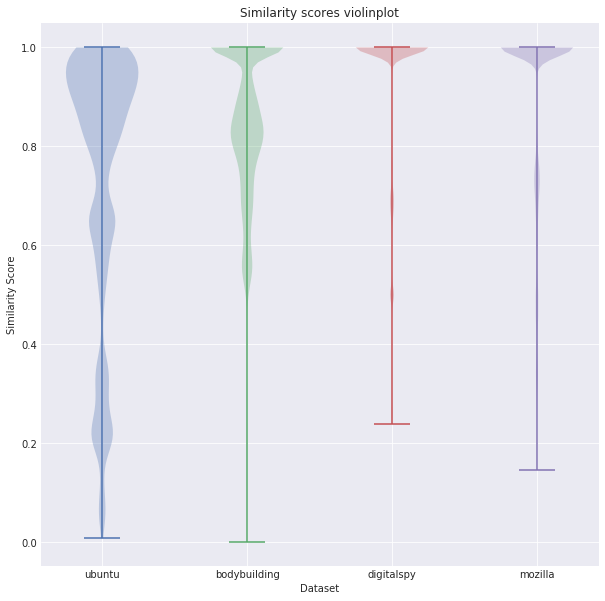

In [13]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 10), dpi=80);
for k,v in datasets.items():
    print(k)
    display(v.head())
    display(v.tail())
    display(v.describe())
    
fig,ax = plt.subplots(figsize=(10, 10))
sns.set_style("darkgrid")
for ii,x in enumerate(datasets.values()):
    vp = ax.violinplot(x["score"],positions=[ii]);
    color = vp['cbars'].get_color()[0]
ax.set_xticks(np.arange(len(datasets)));
ax.set_xticklabels(list(datasets.keys()));
ax.set(xlabel='Dataset', ylabel='Similarity Score')
ax.set_title("Similarity scores violinplot")
fig.savefig("violinplot.png")

In this chart we combine both URL pairs together to analyze how much each URL is used.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Amount'), Text(0.5,0,'Value Count')]

Text(0.5,1,'Url values count')

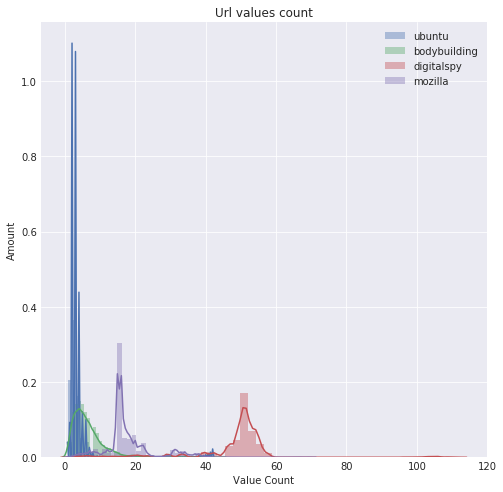

In [17]:
def analyze_mentions(name, df):
    both_urls = df['url1'].append(df['url2'])
    
    counts = both_urls.value_counts()
    ax = sns.distplot(counts, label=name )
    plt.legend()
    return ax

fig = plt.figure(figsize=(8,8))    
for k,v in datasets.items():
    ax = analyze_mentions(k, v)
ax.set(xlabel='Value Count', ylabel='Amount')
ax.set_title("Url values count")
plt.savefig("url_counts.png")

### 2. Data Preparation

The following code will convert the scores data into either one or zero using a threshold of .99 on the semantic similairty score.

In [6]:
def get_training_sets(df):
    ones = df.loc[(df['sem_score'] >= .99)]
    ones = ones.drop(["sem_score", "struct_score"], axis=1)
    ones['score'] = 1
    diffs = df.loc[(df['sem_score'] < .99)]
    diffs = diffs.drop(["sem_score", "struct_score"], axis=1)
    diffs['score'] = 0
    
    if ones.shape[0] < diffs.shape[0]:
        diffs = diffs.sample(n=ones.shape[0], random_state=42)
    else:
        ones = ones.sample(n=diffs.shape[0], random_state=42)
    
    tt_set = pd.DataFrame(columns=["url1", "url2", "score"])
    tt_set = pd.concat([ones, diffs])
    return tt_set

After that, we iterate over each dataset, calculate difference between the lengths for the URLs and for their actual content.

In [13]:

training_sets = {}

for i, dataset in enumerate(datasets.items()):
    name, df = dataset
    print(name)
    cl_df = content_lengths[name]
    ts = get_training_sets(df)
    ts = ts.reset_index(drop=True)
    
    ts['url_diffs'] = abs(df['url2'].str.len() - df['url1'].str.len())
    ts['content_diffs'] = np.nan
    
    for index, row in ts.iterrows():
        cl_row1 = cl_df.loc[cl_df['url'] == row['url1']]
        if cl_row1.empty: continue
        cl_row2 = cl_df.loc[cl_df['url'] == row['url2']]
        if cl_row2.empty: continue
        
        ts.loc[index, 'content_diffs'] = abs(cl_row1['LENGTH(content_text)'].iloc[0] - cl_row2['LENGTH(content_text)'].iloc[0])

    training_sets[name] = ts
    ts.to_csv("trainingsets/"+name+'.csv',)


ubuntu
bodybuilding
digitalspy
mozilla


ubuntu


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Count'), Text(0.5,0,'Url Length Difference')]

Text(0.5,1,'ubuntu')

bodybuilding


[Text(0,0.5,'Count'), Text(0.5,0,'Url Length Difference')]

Text(0.5,1,'bodybuilding')

digitalspy


[Text(0,0.5,'Count'), Text(0.5,0,'Url Length Difference')]

Text(0.5,1,'digitalspy')

mozilla


[Text(0,0.5,'Count'), Text(0.5,0,'Url Length Difference')]

Text(0.5,1,'mozilla')

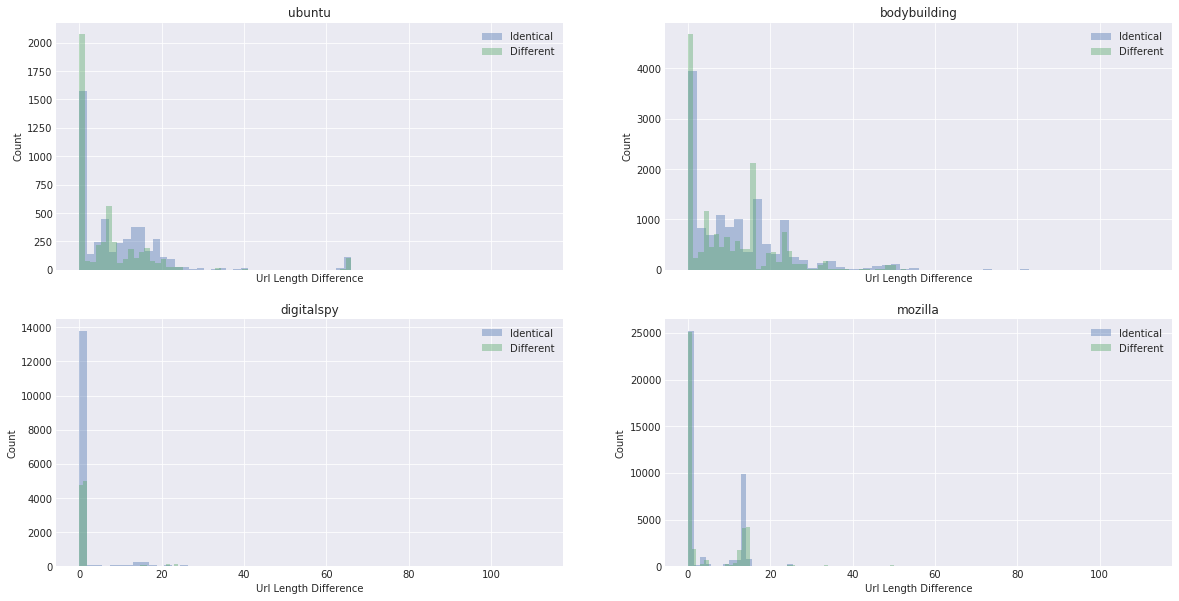

In [19]:
# plotting URL length differences

fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True)
sns.set_palette(current_palette)
    
for i, dataset in enumerate(datasets.items()):
    name, df = dataset
    print(name)
    ts = pd.read_csv("trainingsets/"+name+".csv")

    bin_i = bin(i)[2:]
    if len(bin_i) == 1:
        bin_i = '0' + bin_i
    current_ax = axes[int(bin_i[0])][int(bin_i[1])]
    
    sns.distplot(ts.loc[ts['score'] == 1]["url_diffs"], label="Identical",  kde=False,  ax=current_ax);
    sns.distplot(ts.loc[ts['score'] == 0]["url_diffs"],  label="Different", kde=False,  ax=current_ax);
    current_ax.legend()
    current_ax.set(xlabel='Url Length Difference', ylabel='Count')
    current_ax.set_title(name)

fig.savefig("len_url_diffs.png")

ubuntu


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Count'), Text(0.5,0,'Content Length Difference')]

Text(0.5,1,'ubuntu')

bodybuilding


[Text(0,0.5,'Count'), Text(0.5,0,'Content Length Difference')]

Text(0.5,1,'bodybuilding')

digitalspy


[Text(0,0.5,'Count'), Text(0.5,0,'Content Length Difference')]

Text(0.5,1,'digitalspy')

mozilla


[Text(0,0.5,'Count'), Text(0.5,0,'Content Length Difference')]

Text(0.5,1,'mozilla')

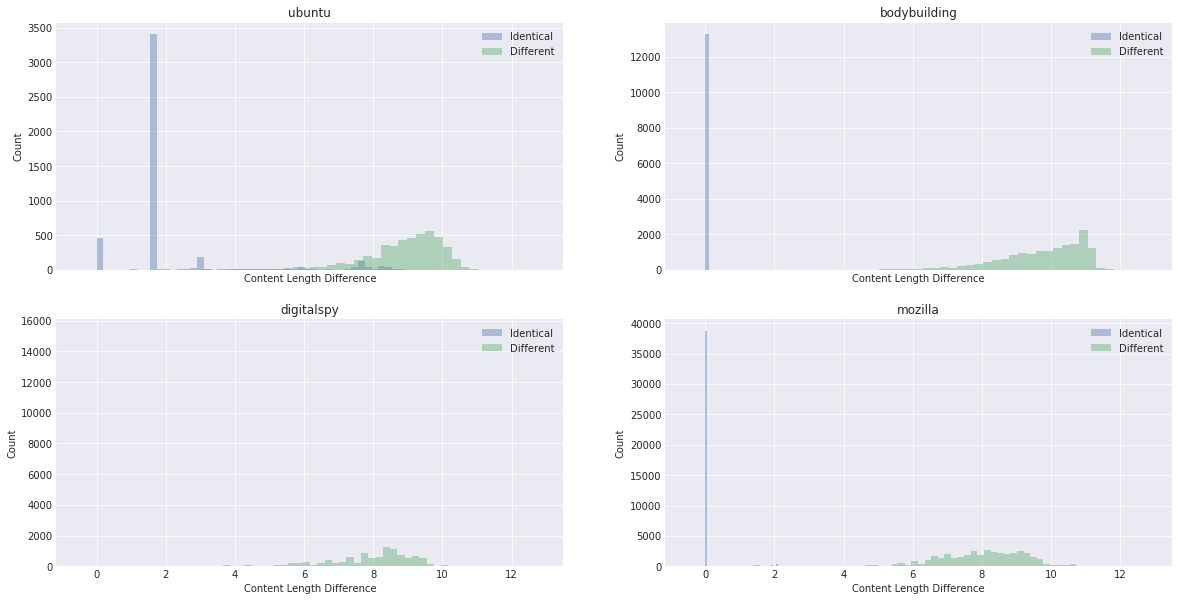

In [20]:
# plotting Content length differences
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True)
sns.set_palette(current_palette)
    
for i, dataset in enumerate(datasets.items()):
    name, df = dataset
    print(name)
    ts = pd.read_csv("trainingsets/"+name+".csv")
    ts = ts[np.isfinite(ts['content_diffs'])]
    ts['co_diffs_log'] = np.log(ts['content_diffs'])
    ts['co_diffs_log'] = ts['co_diffs_log'].replace(-np.inf, 0)

    bin_i = bin(i)[2:]
    if len(bin_i) == 1:
        bin_i = '0' + bin_i
    current_ax = axes[int(bin_i[0])][int(bin_i[1])]

    sns.distplot(ts.loc[ts['score'] == 1]["co_diffs_log"], label="Identical",  kde=False,  ax=current_ax);
    sns.distplot(ts.loc[ts['score'] == 0]["co_diffs_log"],  label="Different", kde=False,  ax=current_ax);
    current_ax.legend()
    current_ax.set(xlabel='Content Length Difference', ylabel='Count')
    current_ax.set_title(name)

fig.savefig("len_content_diffs.png")